Shortest distances: [0, 4, 19, -2, 0, 17]
Predecessors: [None, 0, 1, 1, 3, 4]
Iteration stopped: 2


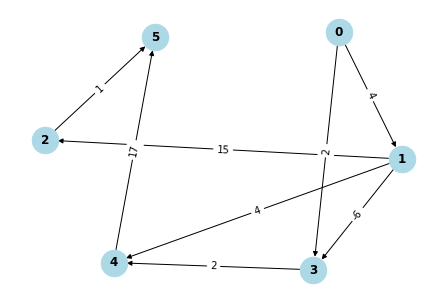

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def bellman_ford(graph, initial_node):
    num_nodes = len(graph)
    
    # Step 1: Initialize distances and predecessors
    distances = [float('infinity')] * num_nodes
    predecessors = [None] * num_nodes
    distances[initial_node] = 0

    # Step 2: Relax edges repeatedly
    for i in range(num_nodes - 1):
        no_updates = True  # Stop condition flag
        for u in range(num_nodes):
            for v in range(num_nodes):
                if graph[u][v] != 'X':  # Non-'X' weight indicates an edge
                    if distances[u] + graph[u][v] < distances[v]:
                        distances[v] = distances[u] + graph[u][v]
                        predecessors[v] = u
                        no_updates = False  # Update occurred, reset the flag
        
        # Stop if there are no updates in the current iteration
        if no_updates:
            break
            
    # Step 3: Check for negative weight cycles
    for u in range(num_nodes):
        for v in range(num_nodes):
            if graph[u][v] != 'X' and distances[u] + graph[u][v] < distances[v]:
                raise ValueError("Graph contains a negative weight cycle")

    return distances, predecessors, i+1

def visualize_graph(graph):
    G = nx.DiGraph()
    num_nodes = len(graph)
    for u in range(num_nodes):
        G.add_node(u)
        for v in range(num_nodes):
            if graph[u][v] != 'X':
                G.add_edge(u, v, weight=graph[u][v])

    pos = nx.spring_layout(G, k=30)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='lightblue')
    edge_labels = {(u, v): weight for u, v, weight in G.edges(data='weight')}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

if __name__ == "__main__":
    # 2Darray
    example_graph = [
        ['X', 4, 'X', 2, 'X', 'X'],
        ['X', 'X', 15, -6, 4, 'X'],
        ['X', 'X', 'X', 'X', 'X', 1],
        ['X', 'X', 'X', 'X', 2, 'X'],
        ['X', 'X', 'X', 'X', 'X', 17],
        ['X', 'X', 'X', 'X', 'X', 'X']
    ]
    # Choose a source node
    source_node = 0

    # Run Bellman-Ford algorithm
    try:
        distances, predecessors, iter_stopped = bellman_ford(example_graph, source_node)
        print("Shortest distances:", distances)
        print("Predecessors:", predecessors)
        print("Iteration stopped:", iter_stopped)
    except ValueError as e:
        print(e)

    # Visualize the graph
    visualize_graph(example_graph)